<a href="https://colab.research.google.com/github/apoorvyadav1111/Oreilly_Handson_Machine_learning_book/blob/main/Handson_chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##import libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score ,confusion_matrix,accuracy_score,precision_recall_curve,precision_score,recall_score,roc_auc_score,roc_curve
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### MNIST

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
X,y = mnist['data'],mnist['target']

In [ ]:
X.shape

(70000, 784)

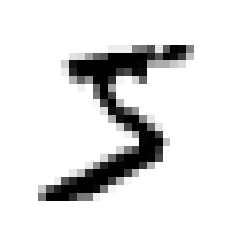

In [ ]:
#visualize an image
import matplotlib.pyplot as plt

digit = X[0]
digit = digit.reshape(28,28)

plt.imshow(digit,cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
(y[0])

'5'

In [ ]:
y = y.astype(np.uint8)

In [ ]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [ ]:
## start with a binary classfier
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [ ]:
## using stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_clf.predict([X[0]])

array([ True])

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = sgd_clf.predict(X_test)
accuracy = accuracy_score(y_pred,y_test_5)
print(accuracy)

0.9492


In [ ]:
## using cross_validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

for train_idx,test_idx in skfolds.split(X_train,y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_idx]
  y_train_folds = y_train_5[train_idx]
  X_test_folds = X_train[test_idx]
  y_test_folds = y_train_5[test_idx]

  clone_clf.fit(X_train_folds,y_train_folds)
  y_pred = clone_clf.predict(X_test_folds)
  n_correct = sum(y_pred==y_test_folds)
  print(n_correct/len(y_pred))

0.9646666666666667
0.9633333333333334
0.9703333333333334
0.9521666666666667
0.9518333333333333
0.9601666666666666
0.9728333333333333
0.9676666666666667
0.9661666666666666
0.9665


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
## Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [ ]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [ ]:
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))

NameError: ignored

In [ ]:
# F1 Score takes into account both P and R
# It is equal to the harmonic mean of P and R
# 2/(1/P+1/R)

from sklearn.metrics import f1_score
print(f1_score(y_train_5,y_train_pred))

NameError: ignored

In [ ]:
some_digit = X[0]
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [ ]:
threshold = 8000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [ ]:
# returning decisive functions rather than predictions

y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

NameError: ignored

In [ ]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
  plt.figure(figsize=(10,5))
  plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
  plt.plot(thresholds,recalls[:-1],"g-",label='Recall')
  plt.legend()
  plt.xlabel("Threshold")
  plt.grid()
  plt.axis(xmin=-60000,xmax=60000,ymin=0,ymax=1)
  recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
  threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

  plt.plot([threshold_90_precision,threshold_90_precision],[0.0,0.9],"r:")
  plt.plot([-60000,threshold_90_precision],[0.9,0.9],"r:")
  plt.plot([-60000,threshold_90_precision],[recall_90_precision,recall_90_precision],"r:")

  plt.plot([threshold_90_precision,threshold_90_precision],[0.9,recall_90_precision],"ro")
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)


In [ ]:
## ROC curve
# reciever operating characteristic curve used with binary classifiers. 
# plots TPR vs FPR true +ve rate vs False +ve rate
# FPR = 1 - TNR (where TNR is the correctly classified negative rate aka specificity)
# Hence ROC plots TPR aka Recall/Sensitivity vs Specificity

In [ ]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

In [ ]:
def plot_roc_curve(fpr,tpr,label=None):
  plt.plot(fpr,tpr,label=label)
  plt.plot([0,1],[0,1],'k--')
  plt.axis([0,1,0,1])
  plt.grid()
  plt.ylabel("True +ve Rate - Recall")
  plt.xlabel("False +ve Rate")

plot_roc_curve(fpr,tpr)

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

NameError: ignored

In [ ]:
## Using RandomForestCLassifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_proba_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')

In [ ]:
y_scores_forest = y_proba_forest[:,1] #proba of the positive class
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)

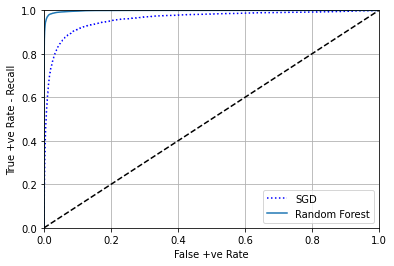

In [ ]:
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc='lower right')
plt.show()

In [ ]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [ ]:
precisions_forest,recalls_forest,thresholds_forest = precision_recall_curve(y_train_5,y_scores_forest)

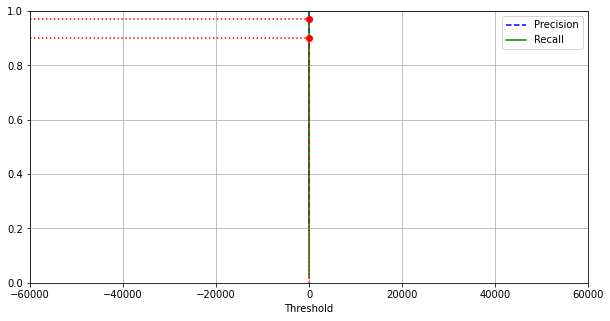

In [ ]:
plot_precision_recall_vs_threshold(precisions_forest,recalls_forest,thresholds_forest)

In [ ]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5,y_train_pred_forest)

0.9905083315756169

In [ ]:
recall_score(y_train_5,y_train_pred_forest)

0.8662608374838591

In [ ]:
## Multiclass Classification
# one vs one dual
# using support vector classifier
from sklearn.svm import SVC

In [ ]:
svm_clf = SVC()
 svm_clf.fit(X_train,y_train)
 svm_clf.predict([some_digit])

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

In [ ]:
svm_clf.classes_(np.argmax(some_digit_scores))

In [ ]:
# forcefully training a one vs rest classifier
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train[:1000],y_train[:1000])
some_digit = X[1]
ovr_clf.predict([some_digit])

array([0], dtype=uint8)

In [ ]:
len(ovr_clf.estimators_)

10

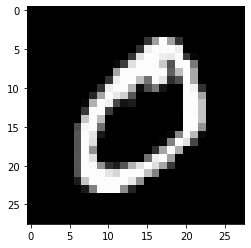

In [ ]:
plt.imshow(some_digit.reshape(28,28),cmap='gray')

In [ ]:
### SGD for One vs Rest Classifier

In [ ]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
some_digit = X[1]
sgd_clf.predict([some_digit])

array(['0'], dtype='<U1')

In [ ]:
sgd_clf.decision_function([some_digit])

array([[ 21906.71324117, -22580.41093047,  -8303.80883987,
        -11803.2511014 , -17445.53166794, -10819.68970471,
        -16875.01645276, -16635.5828067 ,  -6687.58681993,
        -15255.69573327]])

In [ ]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.876  , 0.84465, 0.87825])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.899  , 0.89495, 0.90565])

In [ ]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5568,    0,   22,    6,    9,   49,   36,    6,  226,    1],
       [   0, 6397,   37,   24,    4,   43,    4,    7,  215,   11],
       [  27,   28, 5216,   90,   73,   26,   68,   37,  383,   10],
       [  21,   18,  115, 5218,    1,  207,   26,   39,  414,   72],
       [  12,   14,   39,    8, 5181,   12,   34,   26,  354,  162],
       [  26,   15,   29,  165,   53, 4433,   75,   16,  549,   60],
       [  29,   15,   44,    2,   41,   96, 5548,    4,  138,    1],
       [  19,    9,   52,   28,   51,   14,    3, 5699,  187,  203],
       [  17,   60,   47,   91,    3,  131,   24,   10, 5424,   44],
       [  25,   18,   30,   67,  115,   35,    1,  183,  385, 5090]])

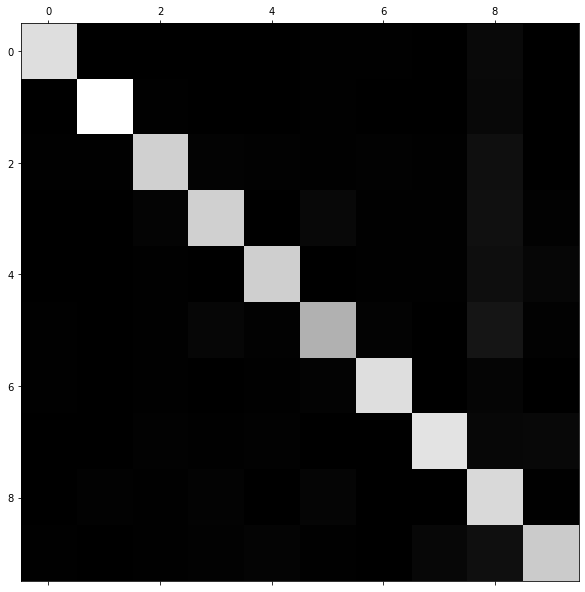

In [ ]:
plt.figure(figsize=(10,10))
plt.matshow(conf_mx,cmap=plt.cm.gray,fignum=1)

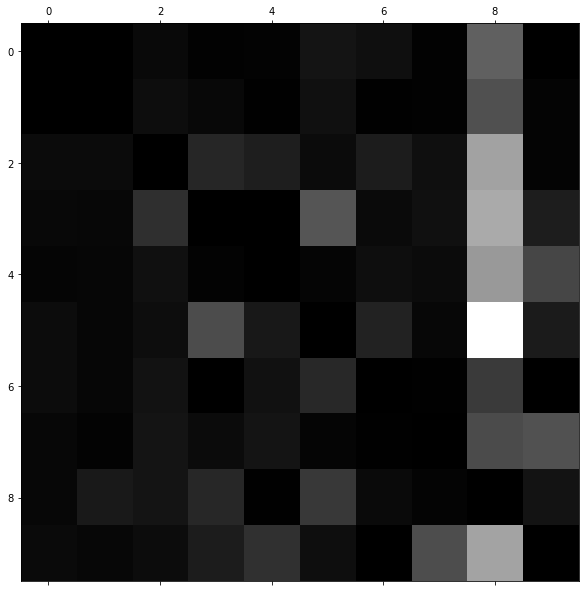

In [ ]:
#normalizing each value in the conf matrix wrt to size of class
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx/row_sums

#fill the diagonal with 0 so as to focus on errors
np.fill_diagonal(norm_conf_mx,0)
plt.figure(figsize=(10,10))
plt.matshow(norm_conf_mx,cmap=plt.cm.gray,fignum=1)
plt.show()

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    print(images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


ZeroDivisionError: ignored

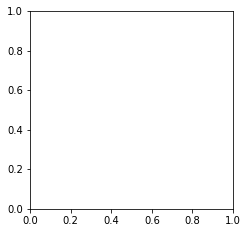

In [ ]:
cl_a,cl_b = 3,5
X_aa = X_train[(y_train == cl_a) & (y_train_pred==cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred==cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred==cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred==cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221)
plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222)
plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223)
plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224)
plot_digits(X_bb[:25], images_per_row=5)
plt.show()

Multilabel Classification

Until now each instance has always been assigned to just one class. In some cases you may want your classifier to output multiple classes for each instance. Consider a face-recognition classifier: what should it do if it recognizes several people in the same picture? It should attach one tag per person it recognizes. Say the classifier has been trained to recognize three faces, Alice, Bob, and Charlie. Then when the classifier is shown a picture of Alice and Charlie, it should output [1, 0, 1] (meaning “Alice yes, Bob no, Charlie yes”). Such a classification system that outputs multiple binary tags is called a multilabel classification system.


In [ ]:
## Using MNIST for Multilabel Classification
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train%2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
some_digit = X[1]

In [ ]:
knn_clf.predict([some_digit])

array([[False, False]])

In [ ]:
y_multilabel[1]

array([False, False])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average='macro')

Multioutput Classification

The last type of classification task we are going to discuss here is called multioutput–multiclass classification (or simply multioutput classification). It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).

To illustrate this, let’s build a system that removes noise from images. It will take as input a noisy digit image, and it will (hopefully) output a clean digit image, represented as an array of pixel intensities, just like the MNIST images. Notice that the classifier’s output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput classification system.

In [ ]:
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train+noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test+noise
y_train_mod = X_train
y_test_mod = X_test

## Exercise


Q1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_test_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_test_pred)

In [ ]:
print(accuracy)

0.9688


In [ ]:
params = [
    {'weights':['uniform','weighted'],'n_neighbors':[3,5,7,9]}
]

knn_grid = GridSearchCV(knn,params,scoring='accuracy',cv=3,return_train_score=True)

In [ ]:
knn_grid.fit(X_train,y_train)

ValueError: ignored

### Question 2.
Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel.5 Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.


In [ ]:
from scipy.ndimage.interpolation import shift

In [ ]:
def shift_image(image,dx,dy):
  image = image.reshape((28,28))
  shifted = shift(image,[dy,dx],cval=0,mode="constant")
  return shifted.reshape([-1])

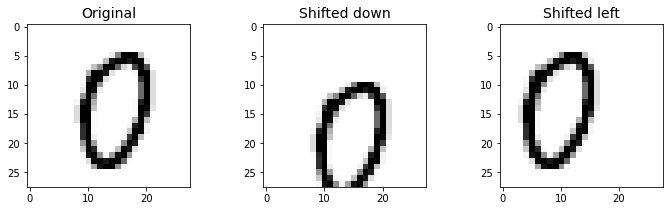

In [ ]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()



In [ ]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx,dy in ((1,0),(-1,0),(0,1),(0,-1)):
  for image,label in zip(X_train,y_train):
    X_train_augmented.append(shift_image(image,dx,dy))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

SyntaxError: ignored

In [ ]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

## Question 3.
Tackling the Titanic Dataset

In [ ]:
import os

TITANIC_PATH = os.path.join("datasets","titanic")

In [ ]:
def load_titanic_data(filename,titanic_path=TITANIC_PATH):
  csv_path = os.path.join(titanic_path,filename)
  return pd.read_csv(csv_path)

In [ ]:
train_data =  load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin

In [ ]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
  def __init__(self,attribute_names):
    self.attribute_names = attribute_names
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    return X[self.attribute_names]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
num_pipeline = Pipeline([
                         ("select_numeric",DataFrameSelector(["Age","SibSp","Parch","Fare"])),
                         ("imputer",SimpleImputer(strategy="median"))
])

In [ ]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [ ]:
class MostFrequentImputer(BaseEstimator,TransformerMixin):
  def fit(self,X,y=None):
    self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],index=X.columns)
    return self
  
  def transform(self,X,y=None):
    return X.fillna(self.most_frequent_)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cat_pipeline = Pipeline([
                         ("select_cat",DataFrameSelector(["Pclass","Sex","Embarked"])),
                         ("imputer",MostFrequentImputer()),
                         ("cat_encoder",OneHotEncoder(sparse=False))
])

In [ ]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [ ]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list = [
                                                       ("num_pipeline",num_pipeline),
                                                       ("cat_pipeline",cat_pipeline)
])

In [ ]:
X_train = preprocess_pipeline.fit_transform(train_data)

In [ ]:
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [ ]:
y_train = train_data["Survived"]

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
X_test = preprocess_pipeline.fit_transform(test_data)
y_pred = svm_clf.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf,X_train,y_train,cv=10)
svm_scores.mean()

0.7329588014981274

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100,random_state=42)
forest_scores = cross_val_score(forest_clf,X_train,y_train,cv=10)
forest_scores.mean()

0.8126466916354558

## Question 4
Build a spam classifier using Apache Spam Assasin public datasets

In [ ]:
#Fetch the date
import os
import urllib
import tarfile

DOWNLOAD_ROOT = "https://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam_2.tar.bz2"

SPAM_PATH = os.path.join("datasets","spam")

def fetch_spam_data(url=SPAM_URL,filepath=SPAM_PATH):
  if not os.path.isdir(filepath):
    os.makedirs(filepath)
  for fname,url in (('ham.tar.bz2',HAM_URL),("spam.tar.bz2",SPAM_URL)):
    path = os.path.join(filepath,fname)
    if not os.path.isfile(path):
      urllib.request.urlretrieve(url,path)
    tar_bz2_file = tarfile.open(path)
    tar_bz2_file.extractall(filepath)
    tar_bz2_file.close()

In [ ]:
fetch_spam_data()

In [ ]:
HAM_DIR = os.path.join(SPAM_PATH,"easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH,"spam_2")
ham_files = [name for name in sorted(os.listdir(HAM_DIR)) if len(name)>20 ]
spam_files = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name)>20 ]

In [ ]:
len(ham_files)

2500

In [ ]:
len(spam_files)

1397

In [ ]:
import email
import email.policy

def load_email(is_spam,filename,spam_path=SPAM_PATH):
  dir = "spam_2" if is_spam else "easy_ham"
  with open(os.path.join(spam_path,dir,filename),"rb") as f:
    return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [ ]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_files]
spam_emails= [load_email(is_spam=True, filename=name) for name in spam_files]

In [ ]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [ ]:
print(spam_emails[6].get_content().strip())

NEW PRODUCT ANNOUNCEMENT

From: OUTSOURCE ENG.& MFG. INC.


Sir/Madam;

This note is to inform you of new watchdog board technology for maintaining
continuous unattended operation of PC/Servers etc. that we have released for
distribution.
  
We are proud to announce Watchdog Control Center featuring MAM (Multiple
Applications Monitor) capability.
The key feature of this application enables you to monitor as many
applications as you
have resident on any computer as well as the operating system for
continuous unattended operation.  The Watchdog Control Center featuring
MAM capability expands third party application "control" of a Watchdog as
access to the application's
source code is no longer needed.

Here is how it all works:
Upon installation of the application and Watchdog, the user may select
many configuration options, based on their model of Watchdog, to fit their
operational needs.  If the MAM feature is enabled, the user may select any
executable program that they wish for monit

In [ ]:
def get_email_structure(email):
  if isinstance(email,str):
    return email
  payload = email.get_payload()
  if isinstance(payload,list):
    return "multipart({})".format(", ".join([
                                             get_email_structure(sub_email)
                                             for sub_email in payload
    ]))
  else:
    return email.get_content_type()

In [ ]:
from collections import Counter

def structures_counter(emails):
  structures = Counter()
  for email in emails:
    structure = get_email_structure(email)
    structures[structure] += 1
  return structures

In [ ]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [ ]:
structures_counter(spam_emails).most_common()

[('text/plain', 598),
 ('text/html', 589),
 ('multipart(text/plain, text/html)', 114),
 ('multipart(text/html)', 29),
 ('multipart(text/plain)', 25),
 ('multipart(multipart(text/html))', 18),
 ('multipart(multipart(text/plain, text/html))', 5),
 ('multipart(text/plain, application/octet-stream, text/plain)', 3),
 ('multipart(text/html, text/plain)', 2),
 ('multipart(text/html, image/jpeg)', 2),
 ('multipart(multipart(text/plain), application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(multipart(text/plain, text/html), image/jpeg, image/jpeg, image/jpeg, image/jpeg, image/jpeg)',
  1),
 ('multipart(multipart(text/plain, text/html), image/jpeg, image/jpeg, image/jpeg, image/jpeg, image/gif)',
  1),
 ('text/plain charset=us-ascii', 1),
 ('multipart(multipart(text/html), image/gif)', 1),
 ('multipart(multipart(text/plain, text/html), application/octet-stream, application/octet-stream, applic

In [ ]:
X = np.array(ham_emails+spam_emails)
y = np.array([0]*len(ham_emails)+[1]*len(spam_emails))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X_train),len(X_test)

(3117, 780)

In [ ]:
import re
from html import unescape

def html_to_plain_text(html):
  text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
  text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
  text = re.sub('<.*?>', '', text, flags=re.M | re.S)
  text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
  return unescape(text)

In [ ]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email)=="text/html"]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000],"...")

<html>
<head>
</head>
<body>

<center>
<font face="times" size="6" color="#000000">Save up to

<font color="#ff0000">75%</font> on your Term Life
Insurance!</font>
<br>  
<font face="times" size="4" color="#000000">
<i>Compare rates from top insurance companies around
the country</i></font>
<br><br>
<font face="arial" size="4" color="#7084D6">
<b>In our life and times, it's important to plan for
your family's future, while 
<br>being comfortable financially.  Choose the right
Life Insurance policy today.</font>
<p>
<font face="arial" size="3" color="#000000">
<i>Click the link below to compare the lowest rates
and save up to <font
color="#ff0000">75%</font></i></b></font>  
<p>
<a
href="http://www.marketing-leader.com/user0202/termquotes/473400/index.htm"><font
face="arial"
size="4">
<b>COMPARE YOUR COVERAGE</b></font></a>
<p>
<font face="times" size="5" color="#000000">
You'll be able to compare rates and get a free
application in <i>less than a minute!</i></font>
<p>
<font face="aria

In [ ]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000],'...')


Save up to
75% on your Term Life
Insurance!
Compare rates from top insurance companies around
the country
In our life and times, it's important to plan for
your family's future, while
being comfortable financially.  Choose the right
Life Insurance policy today.
Click the link below to compare the lowest rates
and save up to 75%
 HYPERLINK
COMPARE YOUR COVERAGE
You'll be able to compare rates and get a free
application in less than a minute!
*Get your FREE instant quotes...
*Compare the lowest prices, then...
*Select a company and Apply Online.
 HYPERLINK
GET A FREE QUOTE NOW!
You can't predict the future, but you can always
prepare for it.
 HYPERLINK to be
excluded from future contacts
cocol
http://xent.com/mailman/listinfo/fork
 ...


In [ ]:
def email_to_text(email):
  html = None
  for part in email.walk():
    ctype = part.get_content_type()
    if not ctype in ("text/plain","text/html"):
      continue
    try:
      content = part.get_content()
    except:
      content = str(part.get_payload())
    if ctype == "text/plain":
      return content
    else:
      html = content
  if html:
    return html_to_plain_text(html)

In [ ]:
print(email_to_text(sample_html_spam)[:1000],'...')


Save up to
75% on your Term Life
Insurance!
Compare rates from top insurance companies around
the country
In our life and times, it's important to plan for
your family's future, while
being comfortable financially.  Choose the right
Life Insurance policy today.
Click the link below to compare the lowest rates
and save up to 75%
 HYPERLINK
COMPARE YOUR COVERAGE
You'll be able to compare rates and get a free
application in less than a minute!
*Get your FREE instant quotes...
*Compare the lowest prices, then...
*Select a company and Apply Online.
 HYPERLINK
GET A FREE QUOTE NOW!
You can't predict the future, but you can always
prepare for it.
 HYPERLINK to be
excluded from future contacts
cocol
http://xent.com/mailman/listinfo/fork
 ...


In [ ]:
!pip install nltk urlextract

In [ ]:
import nltk,urlextract
stemmer = nltk.PorterStemmer()
url_extractor = urlextract.URLExtract()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator,TransformerMixin):
  def __init__(self,strip_header=True,lower_case=True,remove_punctuation=True,
               replace_url=True,replace_numbers=True,stemming=True):
    self.strip_header = strip_header
    self.lower_case = lower_case
    self.remove_punctuation = remove_punctuation
    self.replace_url = replace_url
    self.replace_numbers = replace_numbers
    self.stemming = stemming
  
  def fit(self,X,y=None):
    return self
  
  def transform(self,X,y=None):
    X_transformed = []
    
    for email in X:
      text = email_to_text(email) or ""
      if self.lower_case:
        text = text.lower()
      if self.replace_url and url_extractor is not None:
        urls = list(set(url_extractor.find_urls(text)))
        urls.sort(key=lambda url:len(url),reverse=True)
        for url in urls:
          text = text.replace(url," URL  ")
      if self.replace_numbers:
        text = re.sub(r'\d+(?:\.\d*(?:[eE]\d+))?','NUMBER',text)
      if self.remove_punctuation:
        text = re.sub(r'\W+',' ',text,flags=re.M)
      word_counts = Counter(text.split())
      if self.stemming and stemmer is not None:
        stemmed_word_counts = Counter()
        for word, count in word_counts.items():
          stemmed_word = stemmer.stem(word)
          stemmed_word_counts[stemmed_word] += count
        word_counts = stemmed_word_counts
      X_transformed.append(word_counts)
    return np.array(X_transformed)

In [ ]:
X_few = X_train[:3]
X_few_wc = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wc

array([Counter({'number': 8, 'to': 4, 'a': 4, 'the': 4, 'url': 2, 'ubi': 2, 'china': 2, 'for': 2, 'local': 2, 'date': 1, 'numbertnumb': 1, 'had': 1, 'alway': 1, 'want': 1, 'make': 1, 'pc': 1, 'game': 1, 'market': 1, 'but': 1, 'factor': 1, 'kept': 1, 'idea': 1, 'on': 1, 'hold': 1, 'in': 1, 'januari': 1, 'right': 1, 'incent': 1, 'motiv': 1, 'tri': 1, 'project': 1, 'final': 1, 'arriv': 1, 'licens': 1, 'music': 1, 'up': 1, 'popular': 1, 'anim': 1, 'properti': 1}),
       Counter({'number': 6, 'to': 5, 'you': 5, 'the': 4, 'of': 4, 'receiv': 4, 'thi': 3, 'not': 3, 'email': 3, 'our': 3, 'offer': 3, 'hyperlink': 2, 'plan': 2, 'at': 2, 'and': 2, 'enrol': 2, 'is': 2, 'in': 2, 'are': 2, 'by': 2, 'sign': 1, 'up': 1, 'for': 1, 'full': 1, 'access': 1, 'medic': 1, 'llc': 1, 'applic': 1, 'must': 1, 'be': 1, 'least': 1, 'pay': 1, 'a': 1, 'one': 1, 'time': 1, 'fee': 1, 'regardless': 1, 'depend': 1, 'non': 1, 'insur': 1, 'healthcar': 1, 'avail': 1, 'washington': 1, 'sent': 1, 'unsolicit': 1, 'it': 1, 'be

In [ ]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator,TransformerMixin):
  def __init__(self,vocabulary_size=1000):
    self.vocabulary_size = vocabulary_size
  
  def fit(self,X,y=None):
    total_count = Counter()
    for word_count in X:
      for word, count in word_count.items():
        total_count[word] += min(count,10)
    most_common = total_count.most_common()[:self.vocabulary_size]
    self.most_common = most_common
    self.vocabulary_ = {word:index+1 for index,(word,count) in enumerate(most_common)}
    return self
  
  def transform(self,X,y=None):
    rows = []
    cols = []
    data = []
    for row,word_count in enumerate(X):
      for word, count in word_count.items():
        rows.append(row)
        cols.append(self.vocabulary_.get(word,0))
        data.append(count)
    return csr_matrix((data,(rows,cols)),shape=(len(X),self.vocabulary_size+1))

In [ ]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wc)
X_few_vectors

<3x11 sparse matrix of type '<class 'numpy.longlong'>'
	with 30 stored elements in Compressed Sparse Row format>

In [ ]:
X_few_vectors.toarray()

array([[ 35,   8,   4,   4,   0,   4,   2,   2,   0,   1,   0],
       [109,   6,   5,   4,   4,   1,   1,   1,   1,   2,   5],
       [230,  21,   9,   9,  10,   6,   6,   5,   7,   4,   2]],
      dtype=int64)

In [ ]:
vocab_transformer.vocabulary_

{'a': 5,
 'for': 6,
 'in': 9,
 'number': 1,
 'of': 4,
 'that': 8,
 'the': 3,
 'to': 2,
 'url': 7,
 'you': 10}

In [ ]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
                                ("email_to_wordcount",EmailToWordCounterTransformer()),
                                ("wordcount_to_vector",WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(solver="lbfgs",random_state=42)
score = cross_val_score(log_clf,X_train_transformed,y_train,cv=3,verbose=3)
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  ................................................................
[CV] .................................... , score=0.975, total=   0.2s
[CV]  ................................................................
[CV] .................................... , score=0.992, total=   0.2s
[CV]  ................................................................
[CV] .................................... , score=0.983, total=   0.2s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
  

0.9833172922682065

In [ ]:
from sklearn.metrics import recall_score,precision_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(solver="lbfgs",random_state=42)
log_clf.fit(X_train_transformed,y_train)

y_pred = log_clf.predict(X_test_transformed)

print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.9963768115942029
0.9683098591549296


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
